In [ ]:
#Get on chain data for CerebrumDAO from Etherscan
#This gives you the latest 100 token transfers.
#You can increase offset for more data (up to 10,000 per call)

In [9]:
import requests
import pandas as pd

API_KEY = '66QTUMWYCEKVCX8JJWCVPDHE8M6ZZTH7PX' #'YOUR_ETHERSCAN_API_KEY'
TOKEN_ADDRESS = '0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b'

url = f'https://api.etherscan.io/api?module=account&action=tokentx&contractaddress={TOKEN_ADDRESS}&page=1&offset=10000&sort=desc&apikey={API_KEY}'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['result'])
print(df.head())

# Convert dataframe and inspect
# Check if the request was successful
if data['status'] == '1':
    df = pd.DataFrame(data['result'])
    display(df.head())
else:
    print("Error:", data['message'])

  blockNumber   timeStamp                                               hash  \
0    22458932  1746952379  0xeba706ae11b090787d71c02c6002001c7ef1277e225b...   
1    22458757  1746950255  0xa759af949c90b966190500da77928576d56cbec976f4...   
2    22458652  1746948983  0x81554f52712cce1c0d4bcf42405cb58194b8334fe156...   
3    22458264  1746944279  0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...   
4    22458264  1746944279  0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...   

    nonce                                          blockHash  \
0  302162  0x93f90cc0c72bebf806f5a27555ea90799386ceb50e0b...   
1  332304  0x086bf98ba52923ff135125e2bc18849b329454540360...   
2  302123  0xb1bbe5b84403fcb1214093deb677ac1ca9f4281691a0...   
3      16  0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...   
4      16  0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...   

                                         from  \
0  0x4384273ccd97a503448ca46b3fd1da31689eb2ef   
1  0x4384273ccd97a503448ca46b3fd1da3

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,22458932,1746952379,0xeba706ae11b090787d71c02c6002001c7ef1277e225b...,302162,0x93f90cc0c72bebf806f5a27555ea90799386ceb50e0b...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,3890461847932143344287744,Cerebrum DAO Token,NEURON,18,4,1622211,4705300145,1135548,4343560,deprecated,738
1,22458757,1746950255,0xa759af949c90b966190500da77928576d56cbec976f4...,332304,0x086bf98ba52923ff135125e2bc18849b329454540360...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,3476358672441593716277248,Cerebrum DAO Token,NEURON,18,135,295632,3221202720,206943,13147996,deprecated,913
2,22458652,1746948983,0x81554f52712cce1c0d4bcf42405cb58194b8334fe156...,302123,0xb1bbe5b84403fcb1214093deb677ac1ca9f4281691a0...,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,4037819195394141745840128,Cerebrum DAO Token,NEURON,18,51,294227,4438196303,205959,8137469,deprecated,1018
3,22458264,1746944279,0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...,16,0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...,0x74de5d4fcbf63e00296fd95d33236b9794016631,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x2e5ca1bbaec313db05de9337356517cad2f59811,33552209351838793148152,Cerebrum DAO Token,NEURON,18,166,330517,3552028227,248076,15857938,deprecated,1406
4,22458264,1746944279,0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...,16,0xe98f22491303f39ce6b8f40e2995133da6de4272b93e...,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,0xab814ce69e15f6b9660a3b184c0b0c97b9394a6b,0x74de5d4fcbf63e00296fd95d33236b9794016631,33552209351838793148152,Cerebrum DAO Token,NEURON,18,166,330517,3552028227,248076,15857938,deprecated,1406


In [ ]:
#Understand the Data. Each row is a token transfer

# Key columns:
#from: sender address
#to: recipient address
#value: amount transferred (in token’s smallest unit)
#timeStamp: when it happened (UNIX time)
#hash: transaction hash

In [12]:
# Convert timestamps and values

df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')
df['value'] = df['value'].astype(float) / (10 ** 18)  # Adjust decimals if token uses 18 decimals
display(df[['timeStamp', 'from', 'to', 'value', 'hash']].head())

,timeStamp,from,to,value,hash
0,2025-05-11 08:32:59,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,3.890462e-30,0xeba706ae11b090787d71c02c6002001c7ef1277e225b...
1,2025-05-11 07:57:35,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,3.476359e-30,0xa759af949c90b966190500da77928576d56cbec976f4...
2,2025-05-11 07:36:23,0x4384273ccd97a503448ca46b3fd1da31689eb2ef,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,4.037819e-30,0x81554f52712cce1c0d4bcf42405cb58194b8334fe156...
3,2025-05-11 06:17:59,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x2e5ca1bbaec313db05de9337356517cad2f59811,3.355221e-32,0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...
4,2025-05-11 06:17:59,0x840faba6f38e28e1494f186990f0f17cb2c7bcac,0x74de5d4fcbf63e00296fd95d33236b9794016631,3.355221e-32,0x1aee39af89fadae35b3bd07c1311dfb4bccc9c0a8556...


In [14]:
# SAVE DataFrame to CSV. Last 10000 transactions

df.to_csv('cerebrumdao_transfers.csv', index=False)

In [16]:
# Preliminary analysis of data
# Number of unique holders
unique_holders = df['to'].nunique()
print(f"Unique holders: {unique_holders}")

# Top 10 recipients
top_recipients = df['to'].value_counts().head(10)
print(top_recipients)

Unique holders: 1899
to
0x840faba6f38e28e1494f186990f0f17cb2c7bcac    1317
0x000000fee13a103a10d593b9ae06b3e05f2e7e1c     894
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad     859
0x9008d19f58aabd9ed0d60971565aa8510560ab41     394
0x74de5d4fcbf63e00296fd95d33236b9794016631     279
0x3154cf16ccdb4c6d922629664174b904d80f2c35     154
0xd9c6ee1547fd6d48f8872dd866473893bbe8a1ab     151
0x1111111254eeb25477b68fb85ed929f73a960582     122
0xca74f404e0c7bfa35b13b511097df966d5a65597     115
0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710      90
Name: count, dtype: int64


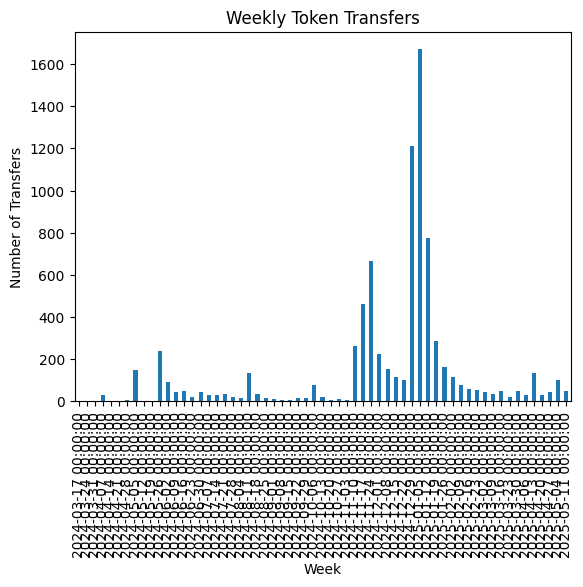

In [17]:
# Visualize the data
# Activity over time

import matplotlib.pyplot as plt

df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')
df.set_index('timeStamp', inplace=True)
df.resample('W').size().plot(kind='bar')
plt.title('Weekly Token Transfers')
plt.xlabel('Week')
plt.ylabel('Number of Transfers')
plt.show()